## Constructing a Efficient Impact Frontier with Smallholder Agro-firm Loans Data

In finance, the "efficient frontier" refers to the work of Harry Markowitz, and is the cornerstone of his Nobel-winning Modern Portfolio Theory. Briefly, it is the graphical representation of portfolios of assets that plots each portfolio's return (usually is Compound Annual Growth Rate) against its risk (usually the standard deviation of its returns). This graphic representation lets us identify which portfolio gives the maximum return at a given level of risk. Naturally, at that level of risk, any rational investor would prefer this return-maximizing portfolio over any other, lower-return portfolio. The graphical curve connecting these return-maximizing portfolios at different levels of risk represents an "efficient frontier", in that along that curve, portfolios offer the most efficient return for their risk levels. Thus, the efficient frontier allows us to visualize and intuitively understand the trade-off between risk and return given a "universe" of investable portfolios.

This concept can be adapted to development / impact / social finance as well. Rather than examine the risk-return tradeoff, one can try the same approach with the relationship between impact and returns. 

Let's load some useful libraries.

In [1]:
import pandas as pd                 # For data manipulation and data cleaning
import numpy as np                  # Math and stuff
import matplotlib.pyplot as plt     # For plotting  
import seaborn as sns               # For plotting
import structures_and_methods       # Contains data structures for easy modality and some functions for data prep
%matplotlib inline                  # Show plots in notebook

This dictionary gives the names of the columns in the data, and the data type of those fields. We'll use it to import the data with the right data types.

In [ ]:
field_converters={'Loan Number':float, 'Loan Amount (USD)':float, 'Industry':str, 'Lending Region':str, \
            'Country':str, 'Loan Additionality':str, 'Climate Change Hotspot':bool,'Biodiversity Hotspot':bool, \
            'Soil Degradation Hotspot':bool, 'Water Scarcity Hotspot':bool, 'Certification':bool, \
            'Planting & maintaining trees for biodiversity conservation and carbon capture':bool, \
            'Clean & appropriate tech for reduced emissions and resource efficiency':bool;,'Poverty Level':str, \
            'Gender Inclusion':bool, 'Livelihood Improvement':str,'Farmers & Employees':float, \
            'Female Farmers & Employees':float, 'Probability of Default':float, 'Expected Revenue':float, \
            'Expected Operating Expenses':float, 'Expected Cost of Debt':float, 'Expected Cost of Risk':float, \
            'Expected Net Loan Income':float,'Female Proportion':float, 'Revenues Net Operational Expense':float}

Now let's import the data from our CSV. Loan is a class of objects from the structures_and_methods.py file, and is a data structure intended to represent a single loan. 

In [2]:
data = pd.read_csv('IFA_Assignment_Data.csv', converters=field_converters)

In [3]:
from structures_and_methods import Loan
for i in data.index:
    
    data.at[i, 'Loan Object'] = Loan(data.at[i, 'Loan Number'] ,\
                                data.at[i, 'Loan Amount (USD)'] ,\
                                data.at[i, 'Industry'] ,\
                                data.at[i, 'Lending Region'] ,\
                                data.at[i, 'Country'] ,\
                                data.at[i, 'Loan Additionality'] ,\
                                data.at[i, 'Climate Change Hotspot'] ,\
                                data.at[i, 'Biodiversity Hotspot'] ,\
                                data.at[i, 'Soil Degradation Hotspot'] ,\
                                data.at[i, 'Water Scarcity Hotspot'] ,\
                                data.at[i, 'Certification'] ,\
                                data.at[i, 'Planting & maintaining trees for biodiversity conservation and carbon capture'],\
                                data.at[i, 'Clean & appropriate tech for reduced emissions and resource efficiency'] ,\
                                data.at[i, 'Poverty Level'] ,\
                                data.at[i, 'Gender Inclusion'] ,\
                                data.at[i, 'Livelihood Improvement'] ,\
                                data.at[i, 'Farmers & Employees'] ,\
                                data.at[i, 'Female Farmers & Employees'] ,\
                                data.at[i, 'Probability of Default'] ,\
                                data.at[i, 'Expected Revenue'] ,\
                                data.at[i, 'Expected Operating Expenses'] ,\
                                data.at[i, 'Expected Cost of Debt'] ,\
                                data.at[i, 'Expected Cost of Risk'] ,\
                                data.at[i, 'Expected Net Loan Income'])

In [4]:
for i in data.index:
    
    data.at[i, 'Expected Impact Rating'] = data.at[i, 'Loan Object'].get_impact_rating()
    if data.at[i, 'Expected Impact Rating'] <= 3:
        data.at[i, 'Impact Group'] = 'Low'
    elif data.at[i, 'Expected Impact Rating'] <= 6.5:
        data.at[i, 'Impact Group'] = 'Intermediate'
    else:
        data.at[i, 'Impact Group'] = 'High'

In [5]:
return_vs_impact = pd.DataFrame()
return_vs_impact['Expected Impact Rating'] = data['Expected Impact Rating']
return_vs_impact['Expected Net Loan Income'] = data['Expected Net Loan Income']

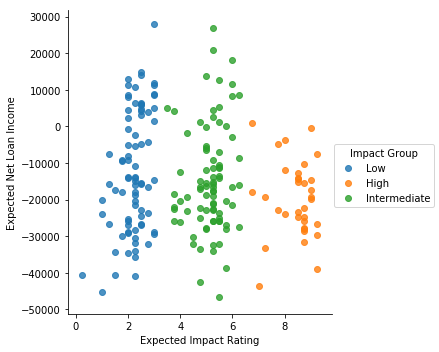

In [6]:
sns.lmplot(x='Expected Impact Rating',
           y='Expected Net Loan Income',
           data=data,
           hue='Impact Group',
           fit_reg=False)


In [7]:
loans = list(data['Loan Object'])
loans[0:5]

In [8]:
#from structures_and_methods import greedy, test_greedy, test_greedies
#test_greedies(loans)

In [12]:
from structures_and_methods import randomPortfolios, calcPortfolioMetrics
portfolios100 = randomPortfolios(loans, 1000000)

In [13]:
portDF = pd.DataFrame()
portDF['portfolio'] = portfolios100
for i in portDF.index:
    portDF.at[i, 'impact'], \
    portDF.at[i, 'income'], \
    portDF.at[i,'impact-group'], \
    portDF.at[i, 'avg-income'] = calcPortfolioMetrics(portDF.at[i, 'portfolio'])

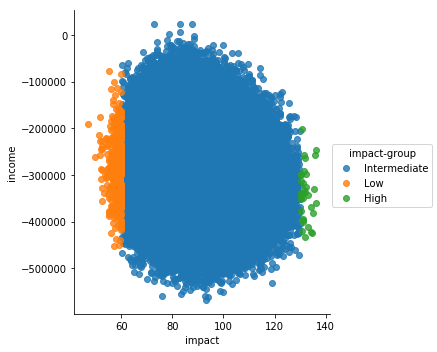

In [25]:
def plotPortfolios(portfolios):
    # intended to take a list of loan instances (the portfolio) and generate a 
    # chart of their positions on the Efficient Impact Frontier
    import seaborn as sns
    sns.lmplot(x='impact',
           y='income',
           data=portfolios,
           hue='impact-group',
           fit_reg=False)
    
plotPortfolios(portDF)

In [15]:
portDF.head()

,portfolio,impact,income,impact-group,avg-income
0,[<structures_and_methods.Loan object at 0x0000...,79.50,-266376.0,Intermediate,-13318.80
1,[<structures_and_methods.Loan object at 0x0000...,92.50,-300173.0,Intermediate,-15008.65
2,[<structures_and_methods.Loan object at 0x0000...,86.00,-229888.0,Intermediate,-11494.40
3,[<structures_and_methods.Loan object at 0x0000...,87.50,-185808.0,Intermediate,-9290.40
4,[<structures_and_methods.Loan object at 0x0000...,75.25,-249335.0,Intermediate,-12466.75


In [33]:
positivePortDF = portDF[portDF['income']>0].reset_index()

In [53]:
port = list(positivePortDF.loc[[3]]['portfolio'])
for i in range(len(port[0])):
    print(port[0][i].get_loan_number())

95.0
178.0
94.0
81.0
91.0
170.0
33.0
46.0
134.0
145.0
37.0
146.0
143.0
126.0
172.0
158.0
9.0
150.0
58.0
177.0


In [51]:
len(port[0])

20